Retos individuales
-> Hackaton: HACK THAT STARTUP
-> Author: Vladimir Smirnov

Challenge 1

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [338]:
data = pd.read_csv("Marketing.csv ")
data.head()

,TV,Radio,Periodico,Redes Sociales,Email,Ingresos
0,230.1,37.8,69.2,151.81,25.85,22.1
1,44.5,39.3,45.1,47.49,55.98,10.4
2,17.2,45.9,69.3,35.76,133.43,9.3
3,151.5,41.3,58.5,109.25,33.17,18.5
4,180.8,10.8,58.4,108.57,8.71,12.9


First off, We must find each correlation with the revenue:

In [339]:
y = data["Ingresos"]
x_1 = data["TV"]
x_2 = data["Radio"]
x_3 = data["Periodico"]
x_4 = data["Redes Sociales"]
x_5 = data["Email"]

In [340]:
def corr(a, b):
    print(np.corrcoef(a, b))
    plt.grid()
    plt.scatter(a, b)

[[1.         0.78222442]
 [0.78222442 1.        ]]


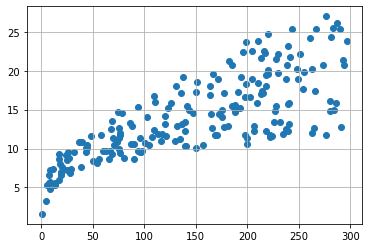

In [341]:
corr(x_1, y) # TV

[[1.         0.57622257]
 [0.57622257 1.        ]]


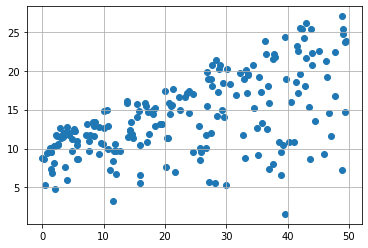

In [342]:
corr(x_2, y) # Radio

[[1.         0.22829903]
 [0.22829903 1.        ]]


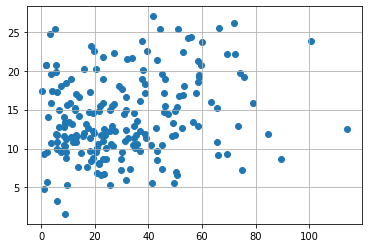

In [343]:
corr(x_3, y) # Periodico

[[1.         0.86108456]
 [0.86108456 1.        ]]


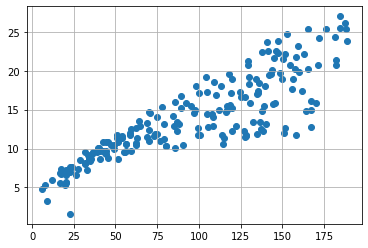

In [344]:
corr(x_4, y) # Redes Sociales

[[ 1.         -0.16196508]
 [-0.16196508  1.        ]]


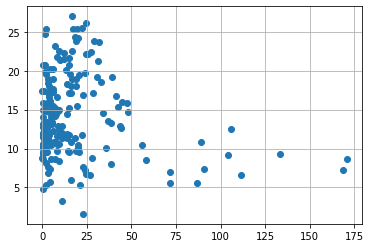

In [345]:
corr(x_5, y) # Email

Answer: As we might appreciate TV and Social networks have a Pearson Correlation Coefficient above 0.7 (0.78222442 and 0.86108456 respectively). Thus, these are good predictors of our outcome of interest which is revenue. On the other hand, the Radio is below O.7. So, despite the fact that the correlation is positive it is not worth the investment. Next, Newspaper performed really poorly with a Correlation Coefficient of only 0.22829903. Thus, we conclude that it is not a good investment for the company to spend capital on Newspaper. Lastly, we have Email, which has a negative value of -0.16196508. That indicates that if the company were about to invest its capital into Email Marketing. Not only it will have no effect, but it will be negative and the company will lose capital in the end. We can also appreciate that only TV and Social networks have a clear linear correlation. Plus, we can graphically interpret that the more we spend in these two areas, the higher the revenue. If we look closer to Email and Newspaper there is no pattern nor linearity in the scatterplot. In summary, the two media that generate the highest economic return are TV and Social Network.

Challenge 2 

A)

First off, we will have to calculate the score one by one and then group all the predictive variables that have the highest correlation. Thus, we will group TV and Social Network in one group to explain revenue. 

In [346]:
from sklearn.linear_model import LinearRegression

In [347]:
x_1 = np.array(x_1).reshape(-1, 1)
x_2 = np.array(x_2).reshape(-1, 1)
x_3 = np.array(x_3).reshape(-1, 1)
x_4 = np.array(x_4).reshape(-1, 1)
x_5 = np.array(x_5).reshape(-1, 1)
x = data[["TV", "Redes Sociales"]]
x_combined = data[["TV", "Radio", "Redes Sociales"]]
lr = LinearRegression()

In [348]:
def lm_score(a, b):
    return lr.fit(a, b).score(a, b)

In [349]:
# TV Score
lm_score(x_1, y)

0.611875050850071

In [350]:
# Radio Score
lm_score(x_2, y)

0.33203245544529525

In [351]:
# Newspaper Score
lm_score(x_3, y)

0.05212044544430516

In [352]:
# Social Network Score
lm_score(x_4, y)

0.741466619941836

In [353]:
# Email Score
lm_score(x_5, y)

0.026232688085826683

In [354]:
# Score of both TV and Social Network
lm_score(x, y)

0.8971943270628265

In [355]:
# Score of TV, Radio and Social Network
lm_score(x_combined, y)

0.8971943384741059

Answer: As we might appreciate, radio, newspaper, and email perform a poor score. On the other hand, the two features we've chosen as our key predictive variables (TV and Social Network) have a score of 0.611875050850071 and 0.8971943270628265 respectively. If we combine them both together, the score is near 0.9 which makes it a really accurate model. Lastly, the score between TV, Radio and Social Network on Revenue has almost the same performance as the TV and Social Network score. Thus, this backs our previous thesis that is not worth the expenditure on Radio. The Best option is to increase the spendings only on TV and Social networks.

B)

In [356]:
x_sne = data[["Redes Sociales", "Email"]]
lr = lr.fit(x_sne, y)

In [357]:
lr.predict([[500, 100]])

array([54.36140839])

Answer: According to the results when we invest 500 in Social Networks and 100 in Email we obtain 54.36 of revenue.  

Challenge 3

In [358]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [359]:
train = fetch_20newsgroups(subset='train', shuffle=True)
test = fetch_20newsgroups(subset='test', shuffle=True)

In [372]:
text_pipe = Pipeline([('cv', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('mnnb', MultinomialNB(fit_prior=False)),
                     ])

In [373]:
text_pipe = text_pipe.fit(train.data, train.target)

In [374]:
pred = text_pipe.predict(test.data)
np.mean(pred == test.target)

0.8214285714285714

Answer: We use a Naive Bayes algorithm to execute the classification and use "np.mean()" where there is the similarity between the real data and the predicted to compute the accuracy. Which gives us a value of 0.8214.